In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install autokeras

     |████████████████████████████████| 174kB 7.1MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=8aaf14a416b4e4e3389741511be05144536d89ead6d041816ae24b2de8d4f212
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=ed8886aebc5b65c0e79093422d287e796d1a1bb3c71ad054d7f17154aa3acef6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
import keras
import tensorflow as tf
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from scipy.io import loadmat
import numpy as np
import PIL
import cv2
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow
import warnings

In [ ]:
'''
x = list()
data = list()
z = 0
y=[]
##Class-1 images##
folder_path_class1 = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/normal_TDPCT_SetA/')
folder_path_class2 = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/normal_TDPCT_SetB/')
folder_path_class3 = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/normal_TDPCT_SetC/')
folder_path_class4 = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/normal_TDPCT_SetD/')
folder_path_class5 = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/normal_TDPCT_SetF/')
folder_path_class1b = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/abnormal_TDPCT_SetA/')
folder_path_class2b = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/abnormal_TDPCT_SetB/')
folder_path_class3b = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/abnormal_TDPCT_SetC/')
folder_path_class4b = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/abnormal_TDPCT_SetD/')
folder_path_class5b = ('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/abnormal_TDPCT_SetF/')

paths = [folder_path_class1,folder_path_class1b,folder_path_class2,folder_path_class2b,folder_path_class3,folder_path_class3b,folder_path_class4,folder_path_class4b,
         folder_path_class5,folder_path_class5b]
for i in range(len(paths)):
  print(i)
  if i%2==0:
    y_l = 0
  elif i%2!=0:
    y_l=1
  for image in os.walk(paths[i]):
    data.append(image[2])
#    print(image[2])

  for j in range(len(data[0])):
    str_complete = paths[i] + data[0][j]
    #print(str_complete)
    img = cv2.imread(str_complete)
    img = cv2.resize(img, (128, 128))
    x.append(img)#Ensure all images are loaded
    y.append(y_l)
  data = []

data_x = np.asarray(x)
np.save('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/scheme1_x',data_x)

y = np.asarray(y)
np.save('/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1/scheme1_y',y) 
'''

In [ ]:
x = np.load('/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2/scheme2_x.npy')
y = np.load('/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2/scheme2_y.npy')

indices = np.arange(x.shape[0])
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

In [ ]:
#loaded_model = tensorflow.keras.models.load_model("/content/drive/MyDrive/PCG_signal_time_frequency_image/Physionet_complete/scheme1", custom_objects=ak.CUSTOM_OBJECTS)
#print(loaded_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 128, 128, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 128, 128, 3)       7         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0     

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings("ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
##Define model
test_acc_list = []
K_cappa_list = []
precision_list = []
recall_list = []
F1_list = []

for iter in range(5):
  print("Trial Number : ", (iter+1))
  loaded_model = tensorflow.keras.models.load_model("/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2", custom_objects=ak.CUSTOM_OBJECTS)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)


  y_tr_one_hot  = np.zeros((np.array(y_train).shape[0],5))
  for i in range(np.array(y_train).shape[0]):
    label = y_train[i]
    y_tr_one_hot[i][int(label)] = 1

  K.clear_session()
  #modelf = model_define()

  #print(modelf.summary())
  optimizer = keras.optimizers.Adam(lr=0.001)
 # loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  y_val_one_hot  = np.zeros((np.array(y_val).shape[0],5))
  for i in range(np.array(y_val).shape[0]):
    label = y_val[i]
    y_val_one_hot[i][int(label)] = 1

#  hist = loaded_model.fit(np.array(x_train), y_tr_one_hot, validation_data=(np.array(x_val), y_val_one_hot), epochs=10,verbose=1)

  y_te_one_hot  = np.zeros((np.array(y_test).shape[0],5))
  for i in range(np.array(y_test).shape[0]):
    label = y_test[i]
    y_te_one_hot[i][int(label)] = 1

  test_loss, test_acc = loaded_model.evaluate(np.array(x_test), np.array(y_te_one_hot), verbose=0)
  print('Accuracy:',test_acc)
  test_acc_list.append(test_acc)

  ##Evaluating Sensitivity, Accuracy and Kappa scores
  y_prob = loaded_model.predict(x_test) 
  Y_pred = y_prob.argmax(axis=-1)

  K_cappa = sklearn.metrics.cohen_kappa_score(y_test,Y_pred)
  print("cohen kappa scores:" ,K_cappa)
  K_cappa_list.append(K_cappa)

  cm1 = confusion_matrix(y_test,Y_pred)
  print("confusion matrix \n",cm1)

  precision = sklearn.metrics.precision_score(y_test,Y_pred,average='micro')
  print('precision : ', precision)
  precision_list.append(precision)

  recall = sklearn.metrics.recall_score(y_test,Y_pred,average='micro')
  print('recall : ', recall)
  recall_list.append(recall)

  F1 = sklearn.metrics.f1_score(y_test,Y_pred,average="micro")
  print("F1 : ", F1)
  F1_list.append(F1)


print('5-Trial Accuracy:',sum(test_acc_list)/len(test_acc_list))
print("5-Trial cohen kappa scores:" ,sum(K_cappa_list)/len(K_cappa_list))
print('5-Trial precision : ', sum(precision_list)/len(precision_list))
print('5-Trial recall : ', sum(recall_list)/len(recall_list))
print("5-Trial F1 : ", sum(F1_list)/len(F1_list))

print("Accuracy list: ",test_acc_list)
print("Cohen Kappa scores: ", K_cappa_list)
print("Precision scores: ", precision_list)
print("Recall list", recall_list)
print("F1 scores", F1_list)

Trial Number :  1


Accuracy: 0.9900000095367432
cohen kappa scores: 0.9874118831822759
confusion matrix 
 [[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 19]]
precision :  0.99
recall :  0.99
F1 :  0.99
Trial Number :  2


Accuracy: 0.9900000095367432
cohen kappa scores: 0.9874118831822759
confusion matrix 
 [[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 19]]
precision :  0.99
recall :  0.99
F1 :  0.99
Trial Number :  3


Accuracy: 0.9900000095367432
cohen kappa scores: 0.9874118831822759
confusion matrix 
 [[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 19]]
precision :  0.99
recall :  0.99
F1 :  0.99
Trial Number :  4


Accuracy: 0.9900000095367432
cohen kappa scores: 0.9874118831822759
confusion matrix 
 [[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 19]]
precision :  0.99
recall :  0.99
F1 :  0.99
Trial Number :  5


Accuracy: 0.9900000095367432
cohen kappa scores: 0.9874118831822759
confusion matrix 
 [[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 19  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 19]]
precision :  0.99
recall :  0.99
F1 :  0.99
5-Trial Accuracy: 0.9900000095367432
5-Trial cohen kappa scores: 0.9874118831822759
5-Trial precision :  0.99
5-Trial recall :  0.99
5-Trial F1 :  0.99
Accuracy list:  [0.9900000095367432, 0.9900000095367432, 0.9900000095367432, 0.9900000095367432, 0.9900000095367432]
Cohen Kappa scores:  [0.9874118831822759, 0.9874118831822759, 0.9874118831822759, 0.9874118831822759, 0.9874118831822759]
Precision scores:  [0.99, 0.99, 0.99, 0.99, 0.99]
Recall list [0.99, 0.99, 0.99, 0.99, 0.99]
F1 scores [0.99, 0.99, 0.99, 0.99, 0.99]


In [ ]:
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=1)

y_tr_one_hot  = np.zeros((np.array(y_train).shape[0],5))
for i in range(np.array(y_train).shape[0]):
  label = y_train[i]
  y_tr_one_hot[i][int(label)] = 1

clf = ak.ImageClassifier(overwrite=True, max_trials=4)
clf.fit(x_train, y_tr_one_hot,epochs=40)
results = clf.predict(x_test)

#model = clf.export_model()
#model.save("/content/drive/MyDrive/PCG_signal_time_frequency_image/model_physionet_database_autokeras", save_format="tf")
'''

In [ ]:
#model = clf.export_model()
#model.save("/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2", save_format="tf")

**5-FOLD CV**

In [ ]:
x = np.load('/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2/scheme2_x.npy')
y = np.load('/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2/scheme2_y.npy')

indices = np.arange(x.shape[0])
np.random.shuffle(indices)
x_cv = x[indices]
y_cv = y[indices]

y_one_hot  = np.zeros((np.array(y_cv).shape[0],5))

for i in range(np.array(y_cv).shape[0]):
  label = y_cv[i]
  y_one_hot[i][int(label)] = 1

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
test_acc_list = []
K_cappa_list = []
precision_list = []
recall_list = []
F1_list = []
iter = 0

for train,test in kfold.split(x_cv,y_cv):
  print("Fold Number : ", (iter+1))
  iter = iter+1
  loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/PCG_signal_time_frequency_image/github_database_5Class_complete/classification_scheme2", custom_objects=ak.CUSTOM_OBJECTS)

  K.clear_session()
  #modelf = model_define()

  #print(modelf.summary())
  optimizer = keras.optimizers.Adam(lr=0.001)
  #loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  #hist = loaded_model.fit(x_cv[train], y_one_hot[train],validation_data=(x_cv[test],y_one_hot[test]),batch_size=256,epochs=15,verbose=0)

  test_loss, test_acc = loaded_model.evaluate(x_cv[test],y_one_hot[test],batch_size=8, verbose=0)
  print('Accuracy:',test_acc)
  test_acc_list.append(test_acc)

  ##Evaluating Sensitivity, Accuracy and Kappa scores
  y_prob = loaded_model.predict(x_cv[test]) 
  Y_pred = y_prob.argmax(axis=-1)

  K_cappa = sklearn.metrics.cohen_kappa_score(y_cv[test],Y_pred)
  print("cohen kappa scores:" ,K_cappa)
  K_cappa_list.append(K_cappa)

  cm1 = confusion_matrix(y_cv[test],Y_pred)
  print("confusion matrix \n",cm1)

  precision = sklearn.metrics.precision_score(y_cv[test],Y_pred,average='micro')
  print('precision : ', precision)
  precision_list.append(precision)

  recall = sklearn.metrics.recall_score(y_cv[test],Y_pred,average='micro')
  print('recall : ', recall)
  recall_list.append(recall)

  F1 = sklearn.metrics.f1_score(y_cv[test],Y_pred,average="micro")
  print("F1 : ", F1)
  F1_list.append(F1)


print('5-FOLD CV Accuracy:',sum(test_acc_list)/len(test_acc_list))
print("5-FOLD CV cohen kappa scores:" ,sum(K_cappa_list)/len(K_cappa_list))
print('5-FOLD CV precision : ', sum(precision_list)/len(precision_list))
print('5-FOLD CV recall : ', sum(recall_list)/len(recall_list))
print("5-FOLD CV F1 : ", sum(F1_list)/len(F1_list))

print("Accuracy list: ",test_acc_list)
print("Cohen Kappa scores: ", K_cappa_list)
print("Precision scores: ", precision_list)
print("Recall list", recall_list)
print("F1 scores", F1_list)

Fold Number :  1


Accuracy: 0.9950000047683716
cohen kappa scores: 0.99375
confusion matrix 
 [[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  1 39  0]
 [ 0  0  0  0 40]]
precision :  0.995
recall :  0.995
F1 :  0.995
Fold Number :  2


Accuracy: 1.0
cohen kappa scores: 1.0
confusion matrix 
 [[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
precision :  1.0
recall :  1.0
F1 :  1.0
Fold Number :  3


Accuracy: 0.9950000047683716
cohen kappa scores: 0.99375
confusion matrix 
 [[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  1  0 39  0]
 [ 0  0  0  0 40]]
precision :  0.995
recall :  0.995
F1 :  0.995
Fold Number :  4


Accuracy: 0.9800000190734863
cohen kappa scores: 0.975
confusion matrix 
 [[40  0  0  0  0]
 [ 0 38  2  0  0]
 [ 0  0 40  0  0]
 [ 0  1  1 38  0]
 [ 0  0  0  0 40]]
precision :  0.98
recall :  0.98
F1 :  0.98
Fold Number :  5


Accuracy: 0.9950000047683716
cohen kappa scores: 0.99375
confusion matrix 
 [[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  1  0 39  0]
 [ 0  0  0  0 40]]
precision :  0.995
recall :  0.995
F1 :  0.995
5-FOLD CV Accuracy: 0.9930000066757202
5-FOLD CV cohen kappa scores: 0.99125
5-FOLD CV precision :  0.993
5-FOLD CV recall :  0.993
5-FOLD CV F1 :  0.993
Accuracy list:  [0.9950000047683716, 1.0, 0.9950000047683716, 0.9800000190734863, 0.9950000047683716]
Cohen Kappa scores:  [0.99375, 1.0, 0.99375, 0.975, 0.99375]
Precision scores:  [0.995, 1.0, 0.995, 0.98, 0.995]
Recall list [0.995, 1.0, 0.995, 0.98, 0.995]
F1 scores [0.995, 1.0, 0.995, 0.98, 0.995]


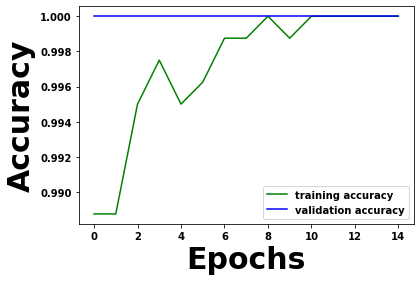

In [ ]:
##Plot results
import matplotlib.pyplot as plt

loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy',fontsize=30,  fontweight='bold')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

plt.legend()
plt.show()